In [57]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
import re

In [59]:
import seaborn as sns

In [60]:
import numpy as np

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 17,6

In [62]:
gstore = pd.read_csv('C:\\Users\\roman\\Learning\\PYDA13\\data\\Google Play Store Apps\\googleplaystore.csv')

In [63]:
gstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [64]:
gstore[gstore['Reviews'].apply(lambda x: x if x.isdecimal() == False else '-') != '-']['Reviews']

10472    3.0M
Name: Reviews, dtype: object

## Анализ данных 



0. **App**  
Тут содрежатся названия приложения, поэтому отсавляем как есть


1. **Category**  
Всего их 34, замечена одна странная категория с названием *1\.9*, она соответсвует всего одному приложению, тоже ушла вместе с удаленной строчкой


2. **Rating**  
Вроде все нормально, есть пропуски, но столбец с первого взгляда не требует внимания


3. **Reviews**  
Было одно некорректное значение, но оно располагалось в строке, которую я удалил, поэтому проблема решилась сама собой


4. **Size**  
Значения с указание размера, причем часть в Мегабайтах, а часть в Килобайтах, в идеале все привести к одним единицам, чтобы было проще сравнивать. По итогу получилось что остались числовые float и строковые Varies with device значения  


5. **Installs**  
Всего 20 уникальных значений, в данных были обнаружены 2 ошибки, было указано два значения *Free* и *0*, под этим подразумевалось скорее всего, что скачиваний нет, поэтому заменил на 0+. Убрал +, он мешают делать вычисления


6. **Type**  
Столбец содержит два уникальных значения *Free* и *Paid*. Было одно некоректное значение 0, скорее всего имелось в виду, что оно бесплатно, поэтому заменил на Free


7. **Price**  
*Цена в долларах, некоторые значения не содержат символ доллара, было одно текстовое значение 'Everyone', что скорее всего соответсвует 0.* Все значения привел к типу float64


8. **Content Rating**  
Возрастная категория, 6 уникальных значений, причем 18+ и нет рейтинга соответсвуют всего 5 приложениям, также есть 1 пропуск


9. **Genres**  
Подкатегория приложения, некоторые приложения включают в себя несколько подкатегорий, при первичном просмотре была обнаружена подкатегория *February 11, 2018,* возможно есть еще какие-то ошибки


10. **Last Updated**  
Дата последнего обновления


11. **Current Ver**    
Версия приложения



12. **Android Ver**  
Необходимая версия Андроид на устройстве

In [65]:
gstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Начинаем работу над столбцами

Работа со столбцом **Type** 

In [66]:
# Начнем анализ со столюца Type
gstore['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [67]:
# Видим, что есть некоректное значение 0, скорее всего имелось в виду, что оно бесплатно
gstore['Type'] = gstore['Type'].replace('0', 'Free')

Работа со столбцом **Installs**

In [68]:
gstore['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Free                 1
0                    1
Name: Installs, dtype: int64

In [69]:
# Изменим Free и 0 на 0+
gstore['Installs'] = gstore['Installs'].replace('0', '0+')
gstore['Installs'] = gstore['Installs'].replace('Free', '0+')

In [70]:
# Приведение значение Installs к integer

def del_pluse(value):
    value = str(value)[:-1]
    value = value.split(',')
    new_value = int(''.join(value))
      
    
    return new_value

In [71]:
gstore['Installs'] = gstore['Installs'].apply(del_pluse)

Работа со столбцом **Price**

In [72]:
# Вроде все цены указаны в долларах, поэтому их лучше перевести в числа для удобства рассчета, при просмотре датафрейма
# увидел значение Everyone, по логике оно соответствуе 0
# проще всего это сделать с помощью функции
gstore['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$89.99         1
$1.97          1
$1.20          1
$5.00          1
$154.99        1
Name: Price, Length: 93, dtype: int64

In [73]:
gstore['Price'] = gstore['Price'].replace('Everyone', '0')

In [74]:
def dollars_to_R(value):
    
    value = str(value)
    price_pattern = r'\d{1,3}\.\d{1,3}'
    
    if value == '0' or value == 0:
        new_value = float(value)
        
    elif re.findall(price_pattern, value):
        new_value = float(re.search(price_pattern, value).group())
    else:
#         на случай если появятся какие-то не числовые значение
        print(value)
        new_value = value
        
    return new_value

In [75]:
# Применим функицю
gstore['Price'] = gstore['Price'].apply(dollars_to_R)

Работа со столбцом **Size**

In [76]:
# Приведем все величины к одной, в данном случае к мегабайтам

def size_to_m(value):
    
    value = str(value)
    
    num_pattern = r'\d+\.\d+|\d+'

    if re.findall(r'\d+M', value):
        new_value = re.search(num_pattern, value).group()

    elif re.findall(r'\d+k', value):
        
        new_value = round(float(re.search(num_pattern, value).group()) / 1000)
        
    elif value == 'Varies with device':
        new_value = value
        
    else:
        print(value)
        new_value = value
        
    return new_value
    

In [77]:
gstore['Size'] = gstore['Size'].apply(size_to_m)

1,000+


In [78]:
# Удалю всю строку, там несколько кривых значений
gstore = gstore.drop(gstore[gstore['Size'] == '1,000+'].index)

Работа со столбцом **Reviews**

In [79]:
#В этом столбце нет ошибок и все значения - числа, поэтому переводим его в integer
gstore['Reviews'] = gstore['Reviews'].astype(str).astype(int)

In [80]:
gstore.rename(columns={'Price': 'Price, $', 'Size': 'Size, M'}, inplace=True)

### Итог преобразования столбцов

In [81]:
gstore

,App,Category,Rating,Reviews,"Size, M",Installs,Type,"Price, $",Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


## Данные готовы к работе. Переходим к графикам

**Рассмотрим зависимоть средней оценки от катергории**  
Рассматриваем топ - 5 категорий  
Топ категория - категория в которой общее число скачиваний приложений максимальное

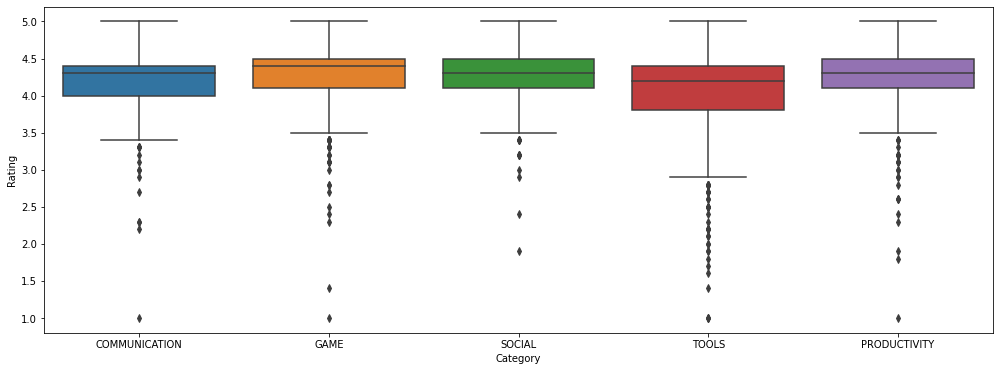

In [109]:
top_cat = gstore.filter(items=['Category', 'Installs']).groupby('Category').sum().sort_values(by='Installs', ascending = False).head(5).index.values
top_cat
sns.boxplot(x="Category", y="Rating", 
            data=gstore[gstore['Category'].isin(top_cat)])

Выводы по этому графику
- больше всего высоких оценок получили игры, думаю, люди не очень серьезно относятся к мобильным играм(скачивают на раз и рассматривают их как убивалку времени в транспорте, очередях и т.д.), поэтому, ставят высокие рейтинги. Также в игры играет много детей, думаю они тоже склонны ставить хорошие оценки

- Ниже всего оценки поставили инструментам, скорее всего это связано с тем, что люди очень требовательны к ним. Скачивают приложение для решения конкретной задачи, а приложение может не всегда выполнять ее. 

**Применим диаграмму pie, чтобы посмотереть топ-категории**

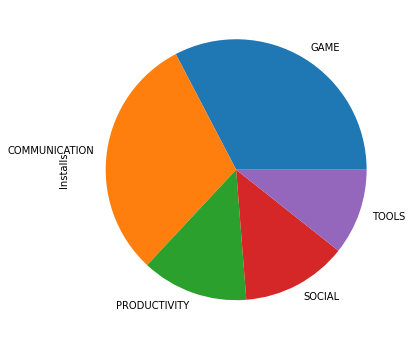

In [121]:
top_cat = gstore.filter(items=['Category', 'Installs']).groupby('Category').sum().sort_values(by='Installs', ascending = False).head(5)
ax = top_cat.plot(kind='pie', subplots=True, legend=False)

Получить понятное визуальное отображение, получилось только для первых 5ти категорий
По графику можно сказать, что неоспоримыми лидерами являются категории общние и игры. Остальные 3 занимают примерно равно положение

**Зависимость рейинга от того платная или бесплатная игра**

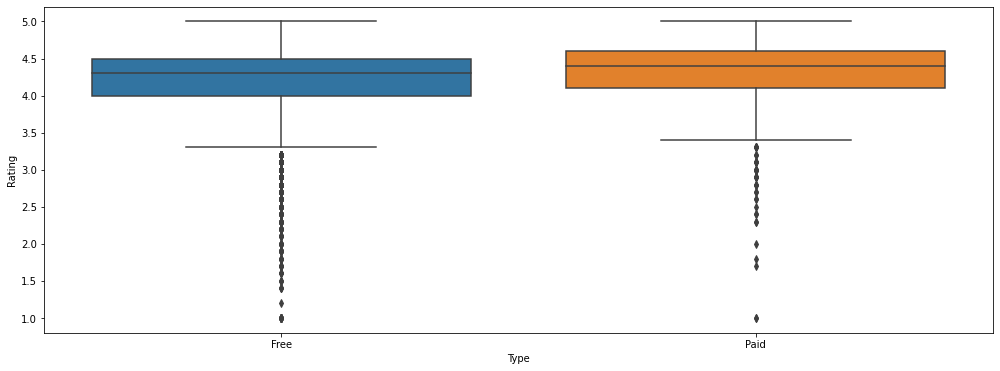

In [83]:
sns.boxplot(x="Type", y="Rating", 
            data=gstore)

Видно, что платые игры в среднем лучше оцениваются всегда, это должно быть связано с бюджетами, у платных приложений в среднем денег больше, и от психологического фактора, человек, как правило, больше внимания уделяет выбору платного приложения, поэтому выбирая то, что нужно у него остается лучше впечатление.

**Зависимость цены и рейтинг**

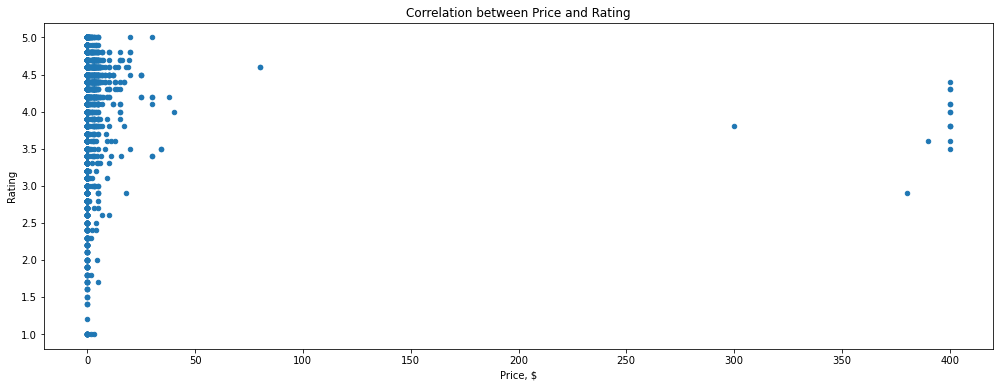

In [84]:
gstore.plot(kind='scatter', 
        x='Price, $', 
        y='Rating', 
        title='Correlation between Price and Rating')

Можно заметить, что с повышением цены, растет минимальный рейтинг и падает максимальный. 
- Рост минимальной оценки скорее всего связано с тем, что среди дешевых приложений много мусора, создатели не уделяют достаточно внимания и финансорования, поэтому приложение получается некачественным. Чем дороже приложение, тем больше финансирование, следовательно растет и качество и оценки
- Спад максимальной оценки скорее всего связан с тем, с ростом цены растут ожидания клиентов, поэтому максимальная оценка падает. К тому же среди бесплатных приложений есть масса приложений, которые зарабатывают на рекламе и донатах, поэтому у них достаточно бюджета для создания хорошего контента.

**Рассмотрим приложения в ценовой категории до 50, так как в этом ценовом сегменте больше всего приложений**

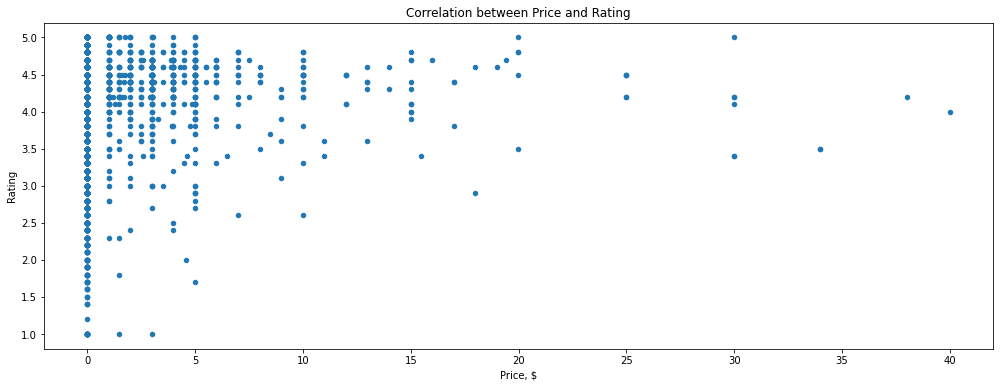

In [85]:
gstore[gstore['Price, $'] < 50].plot(kind='scatter', 
        x='Price, $', 
        y='Rating', 
        title='Correlation between Price and Rating')

Если посмотеть графики поближе, можно заметить, что до 5 максимальная оценка сохраняется на 5, а минимальная растет, после 5 максимальная оценка начинает меняться синусоидально, достигая резких подъемов в точках 10, 15, 20, далее данных становится недостаточно для того, чтобы делать выводы.  
Такая тенденция возможно связана с тем, что цены подходят к психологическим барьерам клиента, пр. если указать цену в 14.99, клиент заплатит охотнее, чем за 15, 15.50, 16, но в тоже время клиенты часто при покупках устанавливают себе лимиты кратно 5, 1000 и другим подобным числам. Поэтому ожидая потратить до 15$ для клиент с большой долей вероятности не будет иметь значение цена в 13 или 14.99 долларов. Таким образом удается получить максимальную прибыль при продаже приложения

**Зависимость рейтинга от количества скачиваний**

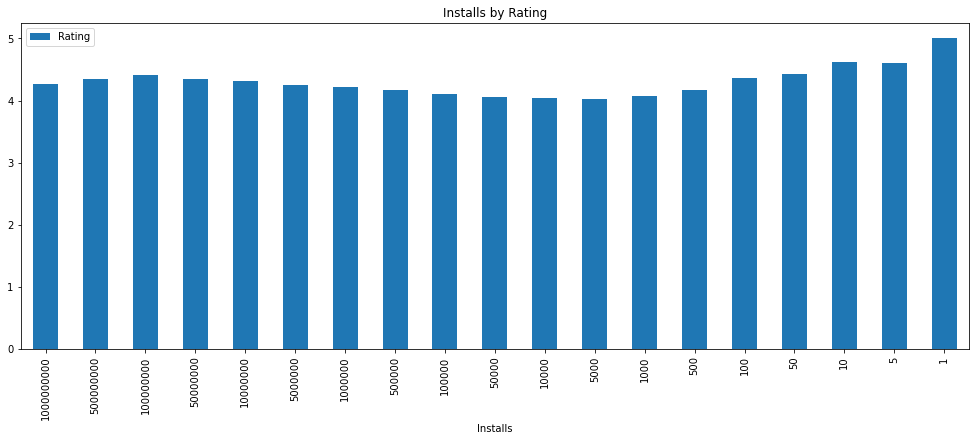

In [86]:
(gstore.filter(items=['Rating', 'Installs']).
 groupby('Installs').mean().sort_values(by='Installs', ascending=False).head(19).
 plot(kind='bar', 
      title='Installs by Rating'))

Получается интересная кривая, значения рейтингов растут до 10М, потом идет постепенный спад и он продолжается до 5К, дальше идет снова плавный подъем до 500, потом начинает резко расти.

Думаю это связано с :
 - 1млрд очень большая аудитория, не может нравится все и всем, к тому же от такого масштаба приложения большие ожидания, это все снижает рейтинг
 - Со снижением аудитории лояльность растет, 10М это гораздо меньше людей, объединненых общими интересами, но в тоже время их достаточно, чтобы приложение имело достатучную прибыль и развивалось, обеспечивая высокое качество
 - Дальнейшее падение аудитории говорит о каких-то проблемах с приложением, оно может не нравится людям, иметь маленький функционал и т.д. Причем тем меньше людей, тем хуже приложение
 - Рост рейтинга у приложений с аудитрией 500 и ниже, скорее всего связан с накруткой, вполне реально создать много аккаутов, попросить друзей, родственников поставить высокую оценку

**Тепловая карта топ 10 категорий относительно рейтингов, где в для каждой категории и каждого значения указывается сумма отзывов**

In [111]:
top_cat = gstore.filter(items=['Category', 'Installs']).groupby('Category').sum().sort_values(by='Installs', ascending = False).head(10).index.values

rating_cat_rev = gstore[gstore['Category'].isin(top_cat)].pivot_table(index='Rating', columns='Category', values='Reviews', aggfunc=sum).fillna(0)

rating_cat_rev

Category,COMMUNICATION,FAMILY,GAME,NEWS_AND_MAGAZINES,PHOTOGRAPHY,PRODUCTIVITY,SOCIAL,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS
Rating,,,,,,,,,,
1.0,5.0,4.0,1.0,0.0,0.0,1.0,0.0,6.0,0.0,0.0
1.4,0.0,0.0,33.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0
1.6,0.0,402.0,0.0,0.0,0.0,0.0,0.0,39.0,0.0,0.0
1.7,0.0,1178.0,0.0,367.0,0.0,0.0,0.0,10.0,0.0,0.0
1.8,0.0,3275.0,0.0,0.0,0.0,12.0,0.0,53.0,0.0,26.0
1.9,0.0,467.0,0.0,0.0,0.0,63.0,16.0,20.0,0.0,105.0
2.0,0.0,27.0,0.0,0.0,16.0,0.0,0.0,2245.0,0.0,0.0
2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,163.0,0.0,0.0
2.2,62.0,54.0,0.0,183.0,0.0,0.0,0.0,1536.0,83.0,32.0


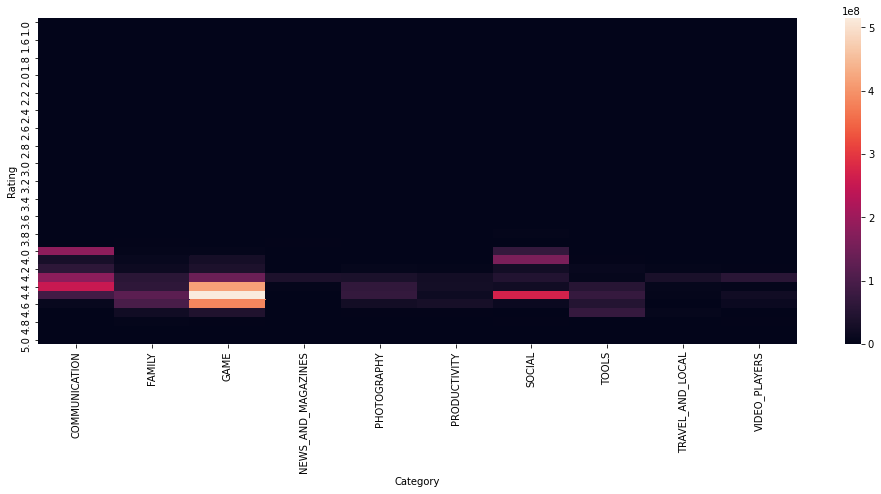

In [112]:
sns.heatmap(rating_cat_rev)

По тепловой карте видно, что большую часть положительных отзывов получают игры, подобная закономерность встречалась уже на другом графике, там было объяснение

**Тепловая карта топ 10 категорий относительно рейтингов, где в для каждой категории и каждого значения указывается средняя сумма установок на устройства**

In [113]:
top_cat = gstore.filter(items=['Category', 'Installs']).groupby('Category').sum().sort_values(by='Installs', ascending = False).head(10).index.values

rating_cat_inst = gstore[gstore['Category'].isin(top_cat)].pivot_table(index='Rating', columns='Category', values='Installs', aggfunc=np.average).fillna(0)

rating_cat_inst

Category,COMMUNICATION,FAMILY,GAME,NEWS_AND_MAGAZINES,PHOTOGRAPHY,PRODUCTIVITY,SOCIAL,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS
Rating,,,,,,,,,,
1.0,1.000000e+02,3.533333e+02,1.000000e+03,0.000000e+00,0.000000e+00,1.000000e+02,0.000000e+00,3.500000e+02,0.000000e+00,0.000000e+00
1.4,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
1.6,0.000000e+00,1.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00
1.7,0.000000e+00,5.050000e+03,0.000000e+00,5.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+02,0.000000e+00,0.000000e+00
1.8,0.000000e+00,2.505000e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,1.000000e+03,0.000000e+00,5.000000e+03
1.9,0.000000e+00,1.866667e+04,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+03,1.000000e+03,1.000000e+03,0.000000e+00,1.000000e+04
2.0,0.000000e+00,5.000000e+03,0.000000e+00,0.000000e+00,1.000000e+03,0.000000e+00,0.000000e+00,2.500500e+06,0.000000e+00,0.000000e+00
2.1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.550000e+04,0.000000e+00,0.000000e+00
2.2,1.000000e+04,1.000000e+04,0.000000e+00,2.550000e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.005000e+05,5.000000e+04,5.000000e+03


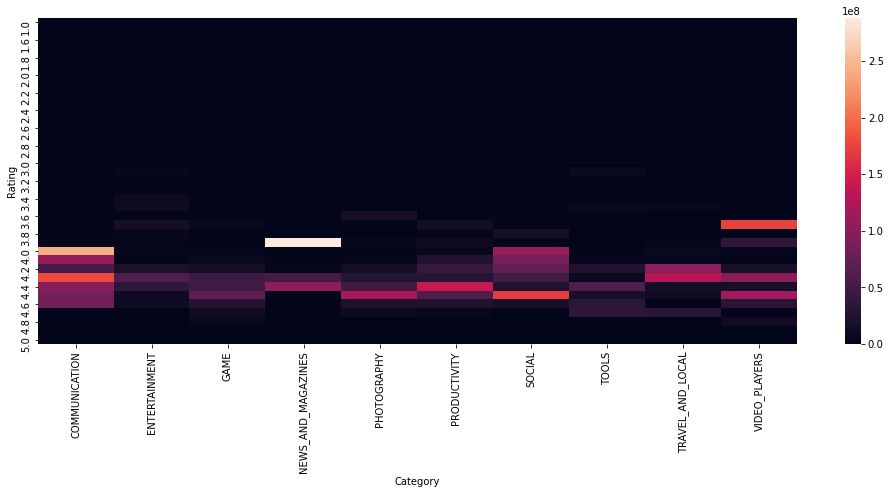

In [90]:
sns.heatmap(rating_cat_inst)

- По тепловой карте видна общая тенденция, что люди предпочитают скачивать игры с более высоким рейтингом, но не максимальным, часто вполне устраивает 3.9+ - 4.0+  
- Интересно выбивается категория новости и журналы, в ней люди предпочитают приложения с рейтингом ~3.8, возможно какое-то авторитетное издание выпустило свое приложение, получилось не очень, но за счет авторитета набирает число скачиваний.  
- Также пользовтелей в категории общении устраивают приложение с очень большим разбросом по рейтингам от 4.0 до 4.6, больше всего скачиваний у приложений с рейтингом ~4, может быть выходят какие-то хайповые приложения, которые быстро теряют свою популярность и рейтинги, но при этом успевают охватить большую аудиторию